In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import distinctipy as dpy

In [4]:
kmeans_df = pd.read_csv("./agren_40_long/km_emb_test.csv")
emb_df = pd.read_csv("./agren_40_long/emb_tsne_test.csv")

labels = sorted(emb_df['label'].unique())
emb_df['label_n'] = emb_df['label'].map(labels.index)

cluster_ns = sorted(emb_df['label_n'].unique())
kmean_ns = sorted(kmeans_df['kmeans_cluster'].unique())


In [5]:
label_ns = sorted(emb_df['label_n'].values)

In [6]:
kmeans_scores_ref = {
    k : dict(emb_df[kmeans_df['kmeans_cluster'] == k]['label_n'].value_counts())
    for k in kmean_ns
}
kmeans_scores_ref

{0: {18: 51},
 1: {1: 204},
 2: {3: 200, 8: 1, 31: 1},
 3: {23: 203},
 4: {25: 204, 10: 1},
 5: {22: 200},
 6: {15: 204},
 7: {19: 204},
 8: {9: 202},
 9: {5: 203},
 10: {39: 4,
  10: 3,
  16: 2,
  20: 1,
  30: 1,
  11: 1,
  36: 1,
  22: 1,
  37: 1,
  35: 1,
  32: 1},
 11: {0: 203, 24: 202},
 12: {33: 203, 7: 203},
 13: {10: 193},
 14: {16: 198},
 15: {38: 204},
 16: {31: 200},
 17: {12: 204, 21: 204, 13: 1, 28: 1, 6: 1},
 18: {2: 203},
 19: {8: 203},
 20: {28: 202},
 21: {27: 204},
 22: {14: 203},
 23: {32: 203},
 24: {35: 203},
 25: {29: 204, 18: 1},
 26: {39: 197},
 27: {11: 202},
 28: {6: 203},
 29: {17: 200},
 30: {26: 202},
 31: {4: 203},
 32: {36: 203},
 33: {13: 203},
 34: {34: 202},
 35: {18: 152},
 36: {10: 7,
  16: 4,
  3: 4,
  17: 4,
  31: 3,
  39: 3,
  22: 3,
  9: 2,
  34: 2,
  24: 2,
  26: 2,
  4: 1,
  33: 1,
  28: 1,
  14: 1,
  5: 1,
  7: 1,
  23: 1,
  0: 1,
  11: 1,
  30: 1,
  2: 1},
 37: {37: 203},
 38: {20: 203},
 39: {30: 202}}

In [7]:
kmean_scores = {
    k : dict(emb_df[kmeans_df['kmeans_cluster'] == k]['label_n'].value_counts())
    for k in kmean_ns
}
        
kmeans_map = {}
while len(kmean_scores) != 0:
    max_score_k = max(
        kmean_scores, 
        key=lambda k: max(list(kmean_scores[k].values()) + [-1])
    )
    max_k_scores = kmean_scores[max_score_k]
    kmean_scores.pop(max_score_k)

    if len(max_k_scores) == 0:
        kmeans_map[max_score_k] = -1
        continue

    max_label = max(max_k_scores, key=max_k_scores.__getitem__)

    print(max_score_k, max_label, max_k_scores[max_label])

    kmeans_map[max_score_k] = max_label

    for k in kmean_scores:
        if max_label in kmean_scores[k]:
            kmean_scores[k].pop(max_label)

print(
    "Key label set sizes: ",
    len(set(kmeans_map.keys())),
    len(set(kmeans_map.values())),
)

emb_df['kmeans_n'] = kmeans_df['kmeans_cluster'].map(lambda k : kmeans_map[k]) 

emb_df

1 1 204
4 25 204
6 15 204
7 19 204
15 38 204
17 12 204
21 27 204
25 29 204
3 23 203
9 5 203
11 0 203
12 33 203
18 2 203
19 8 203
22 14 203
23 32 203
24 35 203
28 6 203
31 4 203
32 36 203
33 13 203
37 37 203
38 20 203
8 9 202
20 28 202
27 11 202
30 26 202
34 34 202
39 30 202
2 3 200
5 22 200
16 31 200
29 17 200
14 16 198
26 39 197
13 10 193
35 18 152
36 24 2
Key label set sizes:  40 39


,tsne0,tsne1,label,file_n,sample_n,file_name,label_n,kmeans_n
0,2.030999,-66.497870,kidney_-_cells_in_tubules_2,0,2244,kidney_-_cells_in_tubules_2_5000(5),14,14
1,4.006860,-71.417076,kidney_-_cells_in_tubules_2,0,2882,kidney_-_cells_in_tubules_2_5000(5),14,14
2,5.541703,-62.442684,kidney_-_cells_in_tubules_2,0,3235,kidney_-_cells_in_tubules_2_5000(5),14,14
3,3.051955,-63.993145,kidney_-_cells_in_tubules_2,0,302,kidney_-_cells_in_tubules_2_5000(5),14,14
4,3.089816,-65.385895,kidney_-_cells_in_tubules_2,0,1921,kidney_-_cells_in_tubules_2_5000(5),14,14
...,...,...,...,...,...,...,...,...
8155,-63.543255,-40.565490,heart_muscle_-_myocytes_2,79,2812,heart_muscle_-_myocytes_2_5000(5),11,11
8156,-60.331467,-36.623283,heart_muscle_-_myocytes_2,79,4608,heart_muscle_-_myocytes_2_5000(5),11,11
8157,-57.033134,-36.264610,heart_muscle_-_myocytes_2,79,3320,heart_muscle_-_myocytes_2_5000(5),11,11
8158,-62.043453,-37.115930,heart_muscle_-_myocytes_2,79,634,heart_muscle_-_myocytes_2_5000(5),11,11


In [8]:
cluster_colors = np.array(dpy.get_colors(len(cluster_ns), pastel_factor=0.8))

emb_df

,tsne0,tsne1,label,file_n,sample_n,file_name,label_n,kmeans_n
0,2.030999,-66.497870,kidney_-_cells_in_tubules_2,0,2244,kidney_-_cells_in_tubules_2_5000(5),14,14
1,4.006860,-71.417076,kidney_-_cells_in_tubules_2,0,2882,kidney_-_cells_in_tubules_2_5000(5),14,14
2,5.541703,-62.442684,kidney_-_cells_in_tubules_2,0,3235,kidney_-_cells_in_tubules_2_5000(5),14,14
3,3.051955,-63.993145,kidney_-_cells_in_tubules_2,0,302,kidney_-_cells_in_tubules_2_5000(5),14,14
4,3.089816,-65.385895,kidney_-_cells_in_tubules_2,0,1921,kidney_-_cells_in_tubules_2_5000(5),14,14
...,...,...,...,...,...,...,...,...
8155,-63.543255,-40.565490,heart_muscle_-_myocytes_2,79,2812,heart_muscle_-_myocytes_2_5000(5),11,11
8156,-60.331467,-36.623283,heart_muscle_-_myocytes_2,79,4608,heart_muscle_-_myocytes_2_5000(5),11,11
8157,-57.033134,-36.264610,heart_muscle_-_myocytes_2,79,3320,heart_muscle_-_myocytes_2_5000(5),11,11
8158,-62.043453,-37.115930,heart_muscle_-_myocytes_2,79,634,heart_muscle_-_myocytes_2_5000(5),11,11


In [9]:
ari_df = pd.read_csv("agren_40_long/ari_test.csv")
ari_df

ari_o = ari_df[ari_df['stage'] == 'origional']
o_aris = np.array(ari_o[['pre', 'emb', 'rec']].sum(), dtype=float)
o_ari_std = np.array(ari_o[['pre_std', 'emb_std', 'rec_std']].sum(), dtype=float)

In [10]:
def lerp(a, b, p):
    return a + p *(b - a)

lerp(np.array([1.0, 0.0, 1.0]), np.array([0.0, 1.0, 0.0]), 0.7)

array([0.3, 0.7, 0.3])

In [11]:
kmeans_p = {}

for kmn in emb_df['kmeans_n'].unique():
    kmn_df = emb_df[emb_df['kmeans_n'] == kmn]
    kmeans_p[kmn] = np.mean(kmn_df['label_n'] == kmn_df['kmeans_n'])

print(kmeans_p)

{14: 1.0, 24: 0.0425531914893617, 25: 0.9951219512195122, 5: 1.0, 10: 1.0, -1: 0.0, 30: 1.0, 33: 0.5, 8: 1.0, 15: 1.0, 12: 0.49635036496350365, 20: 1.0, 6: 1.0, 11: 1.0, 9: 1.0, 13: 1.0, 16: 1.0, 29: 0.9951219512195122, 4: 1.0, 32: 1.0, 3: 0.9900990099009901, 0: 0.5012345679012346, 36: 1.0, 23: 1.0, 31: 1.0, 18: 1.0, 2: 1.0, 26: 1.0, 27: 1.0, 17: 1.0, 19: 1.0, 38: 1.0, 22: 1.0, 39: 1.0, 34: 1.0, 28: 1.0, 35: 1.0, 37: 1.0, 1: 1.0}


In [12]:
import colormaps as cmaps

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [26]:
def plot_ari(ax):
    ax.bar(np.arange(3), o_aris, yerr=o_ari_std, color=cmaps.WhiteBlue.discrete(5).colors[1:-1])
    ax.set_ylim([0,1])
    ax.set_xticks(np.arange(3), ['Origional', 'Embedding', 'Reconstruct'], fontsize=12, rotation=90)
    ax.set_ylabel("Average ARI", fontsize=12)
    ax.spines[['right', 'top']].set_visible(False)


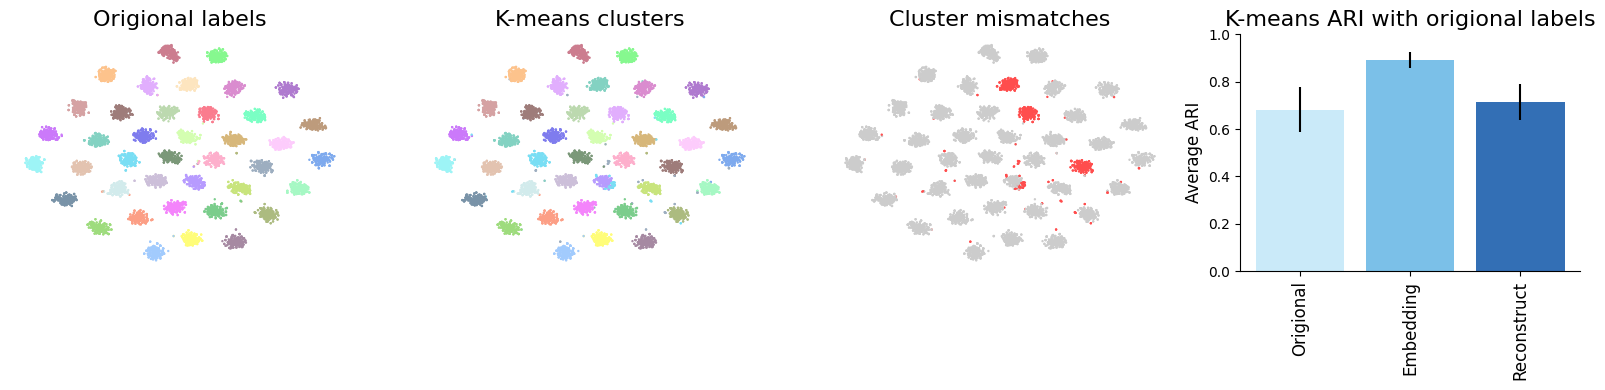

In [27]:
red = np.array([1.0, 0.3, 0.3])
grey = np.array([0.8, 0.8, 0.8])

mismatch_colors = [
    red if label_n != kmean_n else grey
    for label_n, kmean_n in zip(emb_df['label_n'], emb_df['kmeans_n'])
]

color_set = np.array(dpy.get_colors(len(labels), pastel_factor=0.9))

label_colors = color_set[emb_df['label_n']]
kmean_colors = color_set[emb_df['kmeans_n']]


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

#plt.subplots_adjust(wspace=0)

ax1.scatter(emb_df['tsne0'], emb_df['tsne1'], c=label_colors, s=0.5)
ax1.axis('off')
ax1.set_title("Origional labels", fontsize=16)

ax2.scatter(emb_df['tsne0'], emb_df['tsne1'], c=kmean_colors, s=0.5)
ax2.axis('off')
ax2.set_title("K-means clusters", fontsize=16)

ax3.scatter(emb_df['tsne0'], emb_df['tsne1'], c=mismatch_colors, s=0.5)
ax3.axis('off')
ax3.set_title("Cluster mismatches", fontsize=16)

plot_ari(ax4)
ax4.set_title("K-means ARI with origional labels", fontsize=16)

plt.tight_layout()
plt.savefig("./images/F_clustering.png", dpi=600)

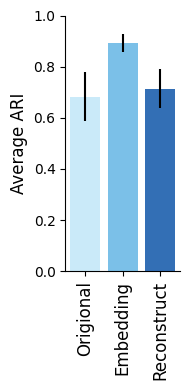

In [34]:
fig, ax = plt.subplots(1,1, figsize=(2, 4))

plot_ari(ax)

fig.tight_layout()
fig.savefig("ari_solo.png", dpi=600)